In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [283]:
df = pd.read_csv("wine_data.csv")
df = df.head(5000)

In [284]:
df['quality'].unique()

array([3, 4])

In [285]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: ylabel='density'>

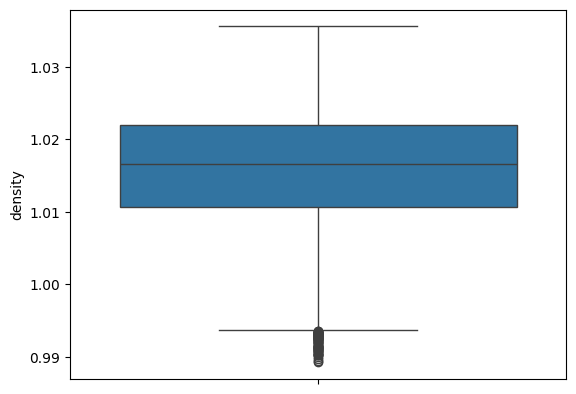

In [286]:
sns.boxplot(df['density'])

In [287]:
y = df.pop("quality")
x = df

In [288]:
x

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0
...,...,...,...,...,...,...,...,...,...,...,...
4995,13.4,0.510,1.32,37.00,0.209,179.8,201.8,1.01668,2.92,0.67,11.7
4996,12.1,1.000,0.61,37.40,0.260,194.3,274.0,1.00239,3.12,1.24,10.9
4997,11.7,0.720,1.06,43.60,0.147,123.7,146.4,1.02119,3.28,0.74,10.7
4998,11.7,1.380,1.01,26.60,0.083,215.0,327.4,1.02467,2.87,1.50,12.9


In [289]:
x_train,x_test,y_train,y_test = train_test_split(x, y , test_size=0.2, random_state=42)

In [290]:
params = {
    'criterion':['gini','entropy','log-loss'],
    'max_depth':[1,2,3,4,5],
    'splitter':['best','random'],
    'max_features':['auto','sqrt','log2']
}

In [291]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [292]:
# from sklearn.model_selection import GridSearchCV
# gri = GridSearchCV(dtree, param_grid=params, scoring='accuracy')
# grid= gri.fit(x_train,y_train)

In [293]:
# grid.best_params_

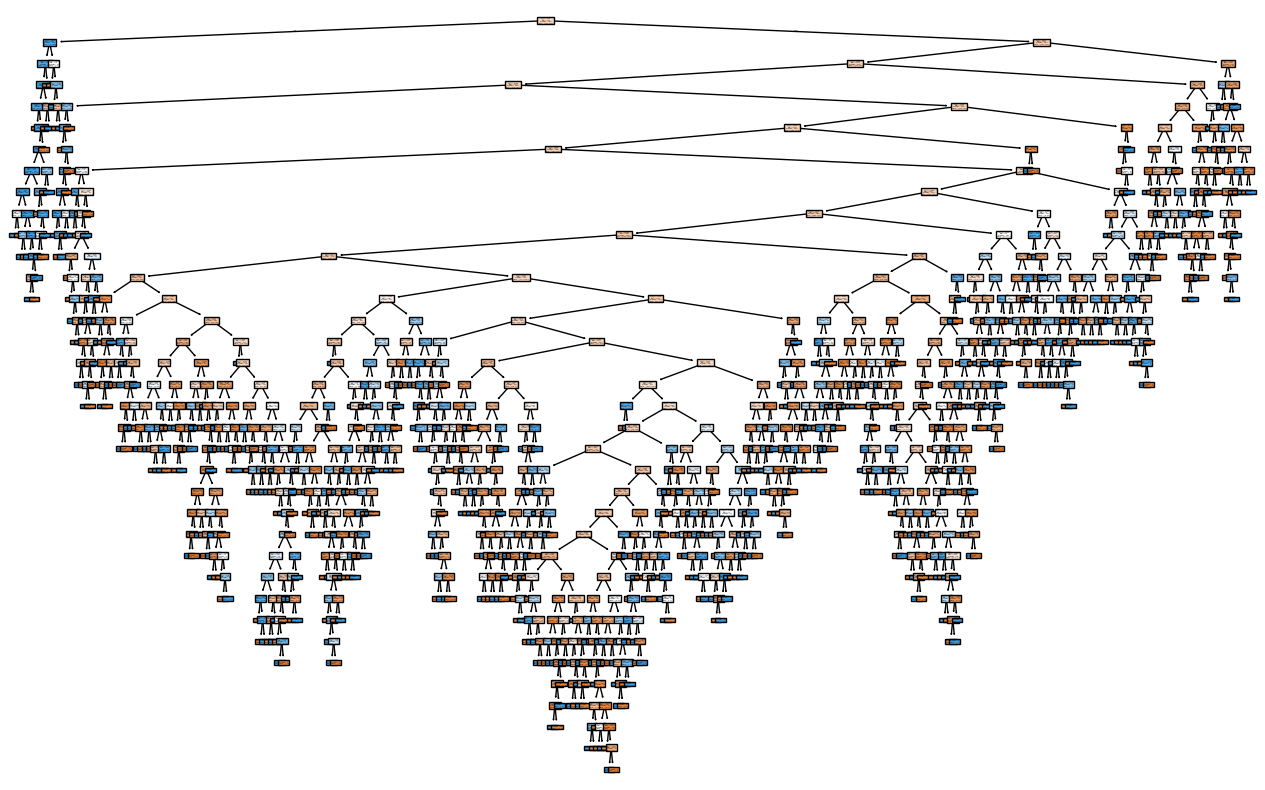

In [302]:
from sklearn import tree

plt.figure(figsize=(16,10))
tree.plot_tree(dtree, filled=True)
plt.show()

In [295]:
train_pred = dtree.predict(x_train)
test_pred = dtree.predict(x_test)

In [296]:
print("Train Report")
print(classification_report(y_train,train_pred))

print("Test Report")
print(classification_report(y_test,test_pred))

Train Report
              precision    recall  f1-score   support

           3       1.00      1.00      1.00      2402
           4       1.00      1.00      1.00      1598

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

Test Report
              precision    recall  f1-score   support

           3       0.79      0.84      0.81       598
           4       0.73      0.67      0.70       402

    accuracy                           0.77      1000
   macro avg       0.76      0.75      0.76      1000
weighted avg       0.77      0.77      0.77      1000

